<a href="https://colab.research.google.com/github/veronica1013/Titanic_Analysis/blob/main/Titanic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic Analysis

### 1.0 Defining the Question

### a.) Specifying the Question

Using K-nearest neighbor (kNN) classifier and Naive Bayes classifier to create a model that predicts which passengers survived the Titanic shipwreck.

### b.) Defining the Metric for Success

1. Computing the accuracy (percentage of correct classification).
2. Reporting the confusion matrix of each classifier.
3. Applying at least one of the optimization techniques.
4. Providing recommendations to improve both classifiers (K-nearest neighbor (kNN) classifier and Naive Bayes classifier).

### c.) Understanding the Context

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. The essence of this project is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Reference [link](https://www.kaggle.com/c/titanic/overview).

### 1.1 Importing the Relevant Libraries

In [116]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score


### 2.0 Loading the Data (both train and test sets)

In [117]:
#uploading the Train Dataset
url_1_train_set = "https://archive.org/download/train5_202002/train%20%285%29.csv"
df_train= pd.read_csv(url_1_train_set)
df_train.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [118]:
# Uploading the Test Dataset
url_2_test_set = "https://archive.org/download/test1_202002/test%20%281%29.csv"
df_test=pd.read_csv(url_2_test_set)
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


### 3.0 Preview the Train and Test Datasets.

#### 3.0.1 Previewing the Train dataset

In [119]:
# Preview the train dataset
df_train.shape

(891, 12)

In [120]:
# Check for the data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
# Check for the basic analysis
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
# Check for missing values
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [123]:
# Check for duplicates
df_train.duplicated().sum()

0

In [124]:
# Check for Columns Names
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

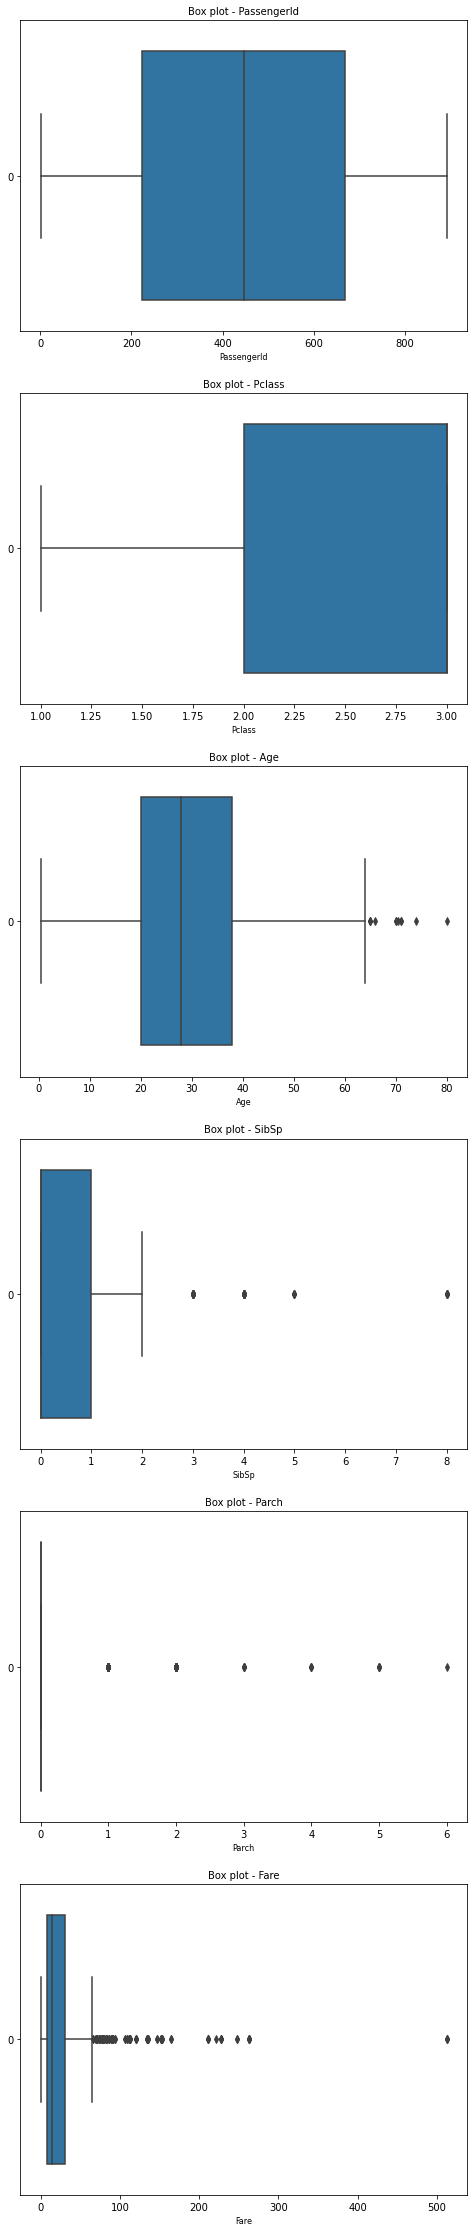

In [125]:
import seaborn as sns
# Check for outliers in the train dataset
# Plotting columns with numerical values only to check for outliers
col_names = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(data = df_train[col_val], ax= ax[i], orient="h")
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [126]:
# Check for outliers Percentage in the train dataset.
# Set the 25th percentile
Quantile_1 = df_train[col_names].quantile(0.25)

# set the 75th percentile
Quantile_3 = df_train[col_names].quantile(0.75)

# calculate the quantile range
IQR = Quantile_3 - Quantile_1

# Determine the outliers
outliers = df_train[col_names][((df_train[col_names] < (Quantile_1 - 1.5 * IQR))
 |(df_train[col_names] > (Quantile_3 + 1.5 * IQR))).any(axis=1)]
j = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(df_train))*100

# The total number of outliers
print(f"The total number of outliers are {j}. Which translates to {percentage_of_outliers}% of the data.")

The total number of outliers are (293, 6). Which translates to 32.88439955106622% of the data.


From the above results, it indicates that 293 rows and 6 columns are affected by outliers. We will print out this outliers to have a deeper look into the details

#### 3.0.2 Previewing the Test Dataset.

In [127]:
# Check the first five rows
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [128]:
# Check for the oldest passengers
df_test['Age'].max()

76.0

In [129]:
# Check for the youngest passengers
df_test['Age'].min()

0.17

In [130]:
# Check for missing values
df_test.isna().sum()

# i'll sort the miising vales on age later
# the cabin column will be dropped because it doesn't help in analysis

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 4.0 External Data Source Validation

The data provided didn't have column definitions so I had to perform validation with the titanic data details available on the Kaggle website. The link to Kaggle website is found [here](https://www.kaggle.com/c/titanic/data).

The validation from the Kaggle website provided lots of insight on the titanic dataset provided. I extracted the column details of the titanic dataset from Kaggle website and the information is as indicated below:

Variable   	  Definition	     Key
1. survival:	Survival	       0 = No, 1 = Yes
2. Pclass:	  Ticket class     1 = 1st, 2 = 2nd, 3 = 3rd
3. Sex:	      Sex	
4. Age:	      Age in years
5. Sibsp:	    # of siblings / spouses aboard the Titanic
6. Parch:     # of parents / children aboard the Titanic
7. Ticket:	  Ticket number	
8. Fare:	    Passenger fare	
9. Cabin:	    Cabin number	
10. Embarked	(Port of Embarkation:	C = Cherbourg, Q = Queenstown, S = Southampton)

**Variable Notes**

Pclass: A proxy for socio-economic status (SES)

*   1st = Upper
*   2nd = Middle
*   3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
*   Sibling = brother, sister, stepbrother, stepsister
*   Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
*   Parent = mother, father
*   Child = daughter, son, stepdaughter, stepson
*   Some children travelled only with a nanny, therefore parch=0 for them.



In [131]:
# Read data from the Kaggle page
import urllib.request
from bs4 import BeautifulSoup

url = "https://www.kaggle.com/c/titanic/data"

html = urllib.request.urlopen(url)

soup = BeautifulSoup(html)

for script in soup(["script", "style"]):
  script.decompose()

strips = list(soup.stripped_strings)
print(strips[:5])

['Titanic - Machine Learning from Disaster | Kaggle']


### 5.0 Performing Exploratory Data Analysis (EDA)

#### 5.0.1 Univirate Analysis

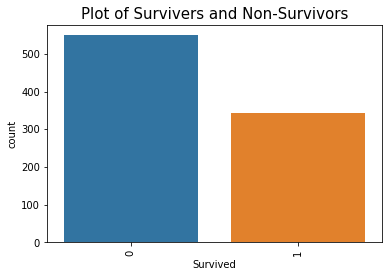

In [132]:
# Import libraries for visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#visuallising the through a Count Plot
sns.countplot(x='Survived', data = df_train) 
plt.title('Plot of Survivers and Non-Survivors', size=15)
plt.xticks(rotation='vertical')
plt.show()

# 0 represents those who didn't survive while 1 represent those who survived

From the above figure, most passengers on board the titanic didn't survive.

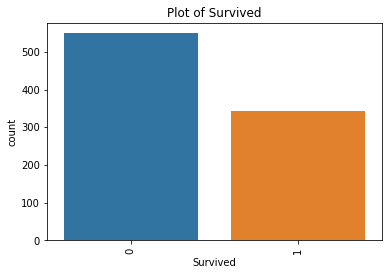

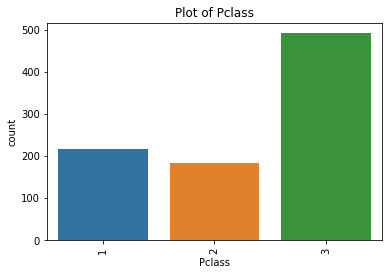

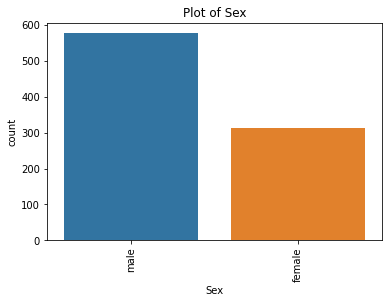

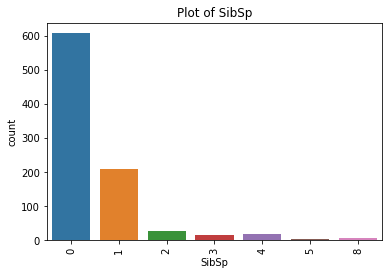

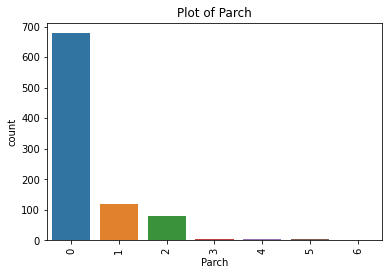

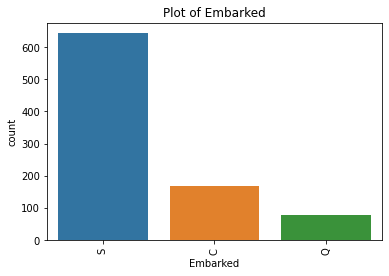

In [133]:
# Plot a count plot for suvival status, class type, sex category, age, number of 
# siblings-spouse, number of parents, cabin and number of passengers per port of embarkation
col = df_train[['Survived','Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]

for i in col:
  #visuallising the through a Count Plot
  sns.countplot(x=i, data = df_train)
  plt.title(f'Plot of {i}')
  plt.xticks(rotation='vertical')
  plt.show()


In [134]:
# Review the cabin details to know if it can be used for further analysis
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [135]:
# Check how many cabin groups are on titanic
df_train.groupby('Cabin').sum()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
A10,584,0,1,36.0,0,0,40.1250
A14,476,0,1,0.0,0,0,52.0000
A16,557,1,1,48.0,1,0,39.6000
A19,285,0,1,0.0,0,0,26.0000
A20,600,1,1,49.0,1,0,56.9292
...,...,...,...,...,...,...,...
F33,930,3,6,87.0,0,0,34.0000
F38,777,0,3,0.0,0,0,7.7500
F4,803,2,4,5.0,4,2,78.0000


In [136]:
df_train['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F2             3
              ..
A10            1
B41            1
E12            1
C30            1
B73            1
Name: Cabin, Length: 147, dtype: int64

After reviewing cabin details of the titanic on the wikipedia website, I decided to drop this column because it was difficult to separate them and catgorize them for further analysis. Source [link](https://en.wikipedia.org/wiki/First-class_facilities_of_the_Titanic). The cabin column will be dropped later during data cleaning. 

In [137]:
# Check the shape of the dataset and compare with the shape of the outliers found
df_train.shape

(891, 12)

In [138]:
df_train.groupby(['Survived']).sum()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,245412,1390,12985.50,304,181,12142.7199
1,151974,667,8219.67,162,159,16551.2294


In [139]:
survived_groups = df_train['Survived'].value_counts()
survived_groups


0    549
1    342
Name: Survived, dtype: int64

In [140]:
survived_groups = pd.crosstab(index=df_train["Survived"], columns="count") 

survived_groups



col_0,count
Survived,
0,549
1,342


In [141]:
# Check the unique values in Pclass column
df_train['Pclass'].unique()

array([3, 1, 2])

#### 5.0.2 Bivariate Analysis

In [142]:
# Get frequency table of the column using Groupby count()
# Preview Number of Passenger Survival by Age and Ticket Class (Pclass)
df_train.groupby(['Survived', 'Age', 'Pclass'])['Pclass'].count()


Survived  Age   Pclass
0         1.0   3         2
          2.0   1         1
                3         6
          3.0   3         1
          4.0   3         3
                         ..
1         62.0  1         1
                2         1
          63.0  1         1
                3         1
          80.0  1         1
Name: Pclass, Length: 264, dtype: int64

In [143]:
# Preview Number of Passenger Survival by Ticket Class (Pclass)
df_train.groupby(['Survived', 'Pclass'])['Pclass'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
Sex: Sex
Age: Age in years
Sibsp: # of siblings / spouses aboard the Titanic
Parch: # of parents / children aboard the Titanic

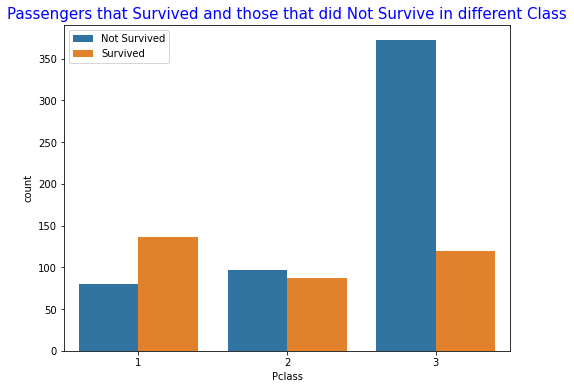

In [144]:
# Passengers that Survived and those that did Not Survive in different Class
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', data=df_train, hue='Survived')
plt.legend(['Not Survived', 'Survived'])
plt.title('Passengers that Survived and those that did Not Survive in different Class', fontsize=15, color='blue')
plt.show();

In [145]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [146]:
# Preview Number of Passenger Survival by number of siblings / spouses aboard the Titanic
df_train.groupby(['Survived', 'SibSp'])['Survived'].count()

Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: Survived, dtype: int64

In [147]:
# Preview Number of Passenger Survival by number of parents / children aboard the Titanic.
df_train.groupby(['Survived', 'Parch'])['Survived'].count()

Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Survived, dtype: int64

In [148]:
# Preview Number of Passenger Survival aboard the Titanic by Sex.
df_train.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

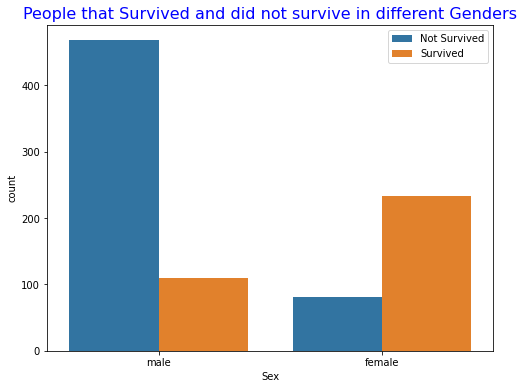

In [149]:
# People that Survived and those did Not Survive in different Genders
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=df_train, hue='Survived')
plt.legend(['Not Survived', 'Survived'])
plt.title('People that Survived and did not survive in different Genders', fontsize=16, color='blue')
plt.show();

In [150]:
# Preview Number of Passenger Survival aboard the Titanic by Sex.
df_train.groupby(['Survived', 'Age'])['Survived'].count()

Survived  Age 
0         1.0     2
          2.0     7
          3.0     1
          4.0     3
          6.0     1
                 ..
1         58.0    3
          60.0    2
          62.0    2
          63.0    2
          80.0    1
Name: Survived, Length: 142, dtype: int64

### 5.0.1 Performing Feature Engineering and Further EDA

In [151]:
# Create a column with age grouped in categories
# but before that I will predict missing passengers age using KNN
# First heck the uniqueness in age (Train set)
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [152]:
# Preview unique values in test set
df_test['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [153]:
# Check the age of the oldest and youngest passenger aboard titanic
print(f"The oldest passenger in the Titanic was {df_train['Age'].max()} years old.\n")

print(f"The youngest passenger in the Titanic was {df_train['Age'].min()} years old.")

The oldest passenger in the Titanic was 80.0 years old.

The youngest passenger in the Titanic was 0.42 years old.


In [154]:
# Create a new column for the age group. we shall group them as follows
#'Toddler/baby, ages 0-9, label 0
#'Teen', ages 10 -17, label 1
#'Youth', ages 18 - 35, label 2
#'Adult' ages 36 - 60, label 3
# 'Elderly' ages 61 - 100, label 4

# First create a copy of the dataframe
df_train_updated = df_train.copy(deep=True)
category = pd.cut(df_train_updated['Age'],bins=[0,9,18,36,61,105],labels=[0,1,2,3,4])
df_train_updated.insert(1,'Age_group',category)
df_train_updated.head(2)

,PassengerId,Age_group,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,3,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [155]:
# Confirm the changes on Age-Group
df_train_updated['Age_group'].unique()

[2, 3, NaN, 0, 1, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [156]:
#  Create a new column for the age group on the test dataset. Details as shown below
#'Toddler/baby, ages 0-9, label 0
#'Teen', ages 10 -17, label 1
#'Youth', ages 18 - 35, label 2
#'Adult' ages 36 - 60, label 3
# 'Elderly' ages 61 - 100, label 4

# First create a copy of the dataframe
df_test_updated = df_test.copy(deep=True)
category = pd.cut(df_test_updated['Age'],bins=[0,9,18,36,61,105],labels=[0,1,2,3,4])
df_test_updated.insert(1,'Age_group',category)
df_test_updated.head(2)

,PassengerId,Age_group,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,2,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


From [Kaggle's](https://www.kaggle.com/c/titanic/data) description “S” is “Southampton”, “C” is “Cherbourg” and “Q” is “Queenstown”. So we will re-map those.

In [157]:
# Re-map “S” as “Southampton”, “C” as “Cherbourg” and “Q” as “Queenstown”. 
df_train_updated['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [158]:
# Create a function that will be used to update the Embarked column
def update_embarked(x):
  if x == "C":
    return "Cherbourg"
  elif x == 'Q':
    return "Queenstown"
  elif x == 'S':
    return "Southampton"
df_train_updated['Embarked'] = df_train_updated['Embarked'].map(update_embarked)


In [159]:
# Confirm Changes on train dataset (sample 5)
df_train_updated.sample(5)

,PassengerId,Age_group,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
509,510,2,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,Southampton
482,483,3,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,Southampton
548,549,2,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.5250,NaN,Southampton
650,651,NaN,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,Southampton
3,4,2,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton


In [160]:
# Confirm Changes on test dataset (sample 5)
df_test_updated['Embarked'] = df_test_updated['Embarked'].map(update_embarked)
df_test_updated.sample(5)

,PassengerId,Age_group,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
158,1050,3,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.5500,D22,Southampton
126,1018,2,3,"Brobeck, Mr. Karl Rudolf",male,22.0,0,0,350045,7.7958,NaN,Southampton
338,1230,2,2,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,NaN,Southampton
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Queenstown
328,1220,2,2,"Clarke, Mr. Charles Valentine",male,29.0,1,0,2003,26.0000,NaN,Southampton


In [161]:
# Check the number of passengers per port of embarkation
df_train_updated['Embarked'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

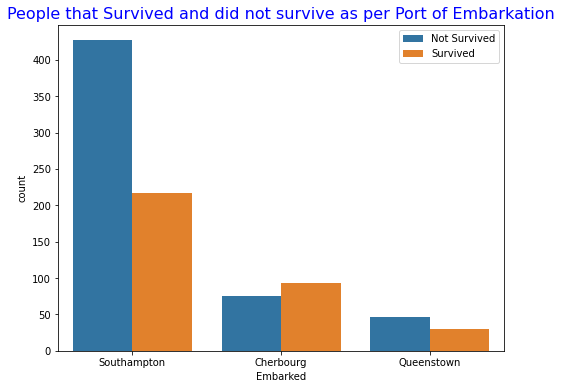

In [162]:
# Check the survivors per port of embarkation
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', data=df_train_updated, hue='Survived')
plt.legend(['Not Survived', 'Survived'])
plt.title('People that Survived and did not survive as per Port of Embarkation', fontsize=16, color='blue')
plt.show();

According to the Kaggle description:
"sibsp" stands for sibling and spouse. Details are as follows;
> Sibling = Brother, Sister, Stepbrother, Stepsister
> Spouse = Husband, Wife (mistresses and fiancés were ignored)

"parch": The dataset defines family relations in this way...
> Parent = Mother, Father
> Child = Daughter, Son, Stepdaughter, Stepson (Some children travelled only with a nanny, therefore parch=0 for them).

“SibSp” and “Parch” together would make up a “FamilySize” so I will create a new feature for that (Family_Members.

In [163]:
# Preview unique features on the Sibling-spouse (SibSp) columns
df_train_updated['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [164]:
# Preview uniques values on the Parent-child (Parch) column
df_train_updated['Parch'].unique()

# The value 0 is for those children who travelled with the nanny

array([0, 1, 2, 5, 3, 4, 6])

In [165]:
# Create a new column for family members
df_train_updated['Family_Members'] = df_train_updated['SibSp'] + df_train_updated['Parch']

# Create a table for Family members and calculate their averages
df_train_updated.groupby('Family_Members').agg({"Family_Members" : 'count', "Survived" : 'mean'}).sort_index()

,Family_Members,Survived
Family_Members,,
0,537,0.303538
1,161,0.552795
2,102,0.578431
3,29,0.724138
4,15,0.200000
5,22,0.136364
6,12,0.333333
7,6,0.000000
10,7,0.000000


In [166]:
# Create a copy of the test dataset
df_test_copy = df_test_updated.copy(deep=True)
df_test_copy['Family_Members'] = df_test_copy['SibSp'] + df_test_copy['Parch']
df_test_copy.sample(6)

,PassengerId,Age_group,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members
110,1002,3,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,NaN,Cherbourg,0
256,1148,NaN,3,"Mahon, Mr. John",male,NaN,0,0,AQ/4 3130,7.7500,NaN,Queenstown,0
411,1303,3,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Queenstown,1
129,1021,2,3,"Petersen, Mr. Marius",male,24.0,0,0,342441,8.0500,NaN,Southampton,0
44,936,3,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,Southampton,1
186,1078,2,2,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,Southampton,1


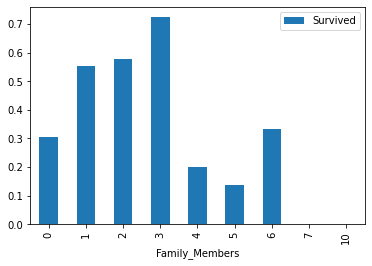

In [167]:
# Number of passenger survived as per the family members
df_train_updated.groupby('Family_Members').agg({"Survived" : 'mean'}).plot(kind='bar');

It is noted that those who were three family members had a higher survival rate, followed by those who were two family members, then 1 and 6.

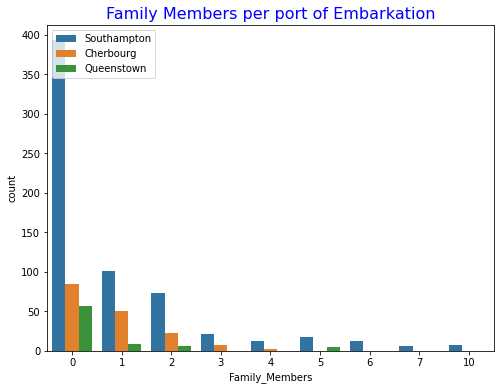

In [168]:
# Family Members per port of Embarkation
plt.figure(figsize=(8,6))
sns.countplot(x='Family_Members', data=df_train_updated, hue='Embarked')
plt.legend(['Southampton', 'Cherbourg', 'Queenstown'])
plt.title('Family Members per port of Embarkation', fontsize=16, color='blue')
plt.show();

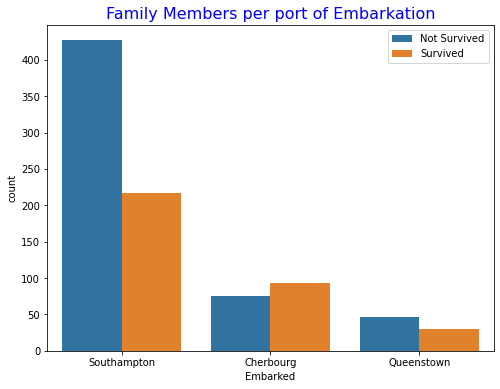

In [169]:
# Number of Survivors per port of Embarkation
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', data=df_train_updated, hue='Survived')
plt.legend(['Not Survived', 'Survived'])
plt.title('Family Members per port of Embarkation', fontsize=16, color='blue')
plt.show();

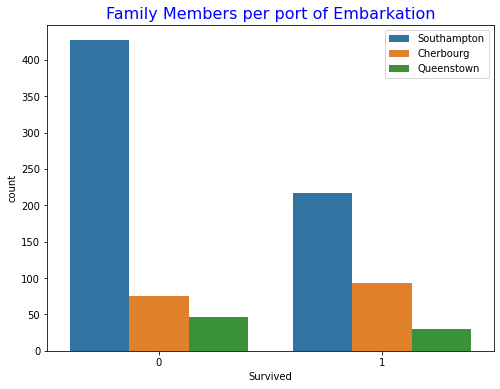

In [170]:
# Number of Survivors per port of Embarkation
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=df_train_updated, hue='Embarked')
plt.legend(['Southampton', 'Cherbourg', 'Queenstown'])
plt.title('Family Members per port of Embarkation', fontsize=16, color='blue')
plt.show();

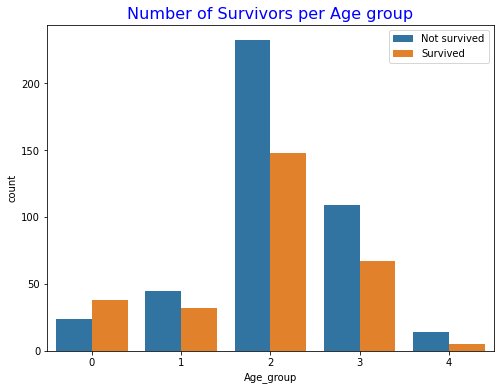

In [171]:
# Number of Survivors per Age group
plt.figure(figsize=(8,6))
sns.countplot(x='Age_group', data=df_train_updated, hue='Survived')
plt.legend(['Not survived', 'Survived'])
plt.title('Number of Survivors per Age group', fontsize=16, color='blue')
plt.show();

#'Toddler/baby, ages 0-9, label 0
#'Teen', ages 10 -17, label 1
#'Youth', ages 18 - 35, label 2
#'Adult' ages 36 - 60, label 3
# 'Elderly' ages 61 - 100, label 4

It is evident that the highest number of passengers who didn't survive on board of the titanic was that of the youth followed by adults between the age of 36 and 60. 

We can have a look at the name deatils and see what information was provided and see if it can be useful or we drop the name column.

In [172]:
# Preview the passenger names on the train dataset
df_train_updated['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [173]:
# preview the passenger names on the test dataset
df_test_copy['Name']

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

The name details has passenger titles in them. We will try to extract the titles from the passenger names.

In [174]:
# Create the title column on the train dataset
df_train_updated['Title'] = df_train_updated['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
df_train_updated.head(2)

,PassengerId,Age_group,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members,Title
0,1,2,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,1,Mr
1,2,3,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,1,Mrs


In [175]:
# create the Title column on the test dataset
df_test_copy['Title'] = df_test_copy['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
df_test_copy.head(2)

,PassengerId,Age_group,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members,Title
0,892,2,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,0,Mr
1,893,3,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,1,Mrs


In [176]:
# Check the counts per Title
df_train_updated['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
the Countess      1
Mme               1
Ms                1
Don               1
Capt              1
Lady              1
Sir               1
Name: Title, dtype: int64

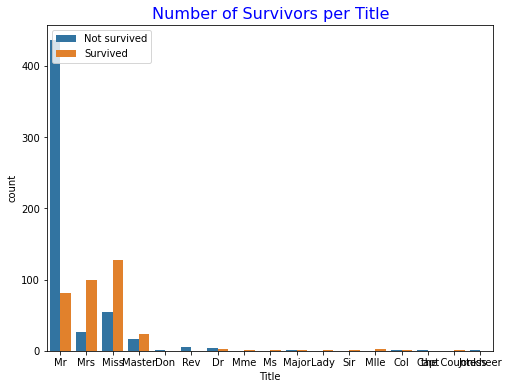

In [177]:
# Number of Survivors per Title
plt.figure(figsize=(8,6))
sns.countplot(x='Title', data=df_train_updated, hue='Survived')
plt.legend(['Not survived', 'Survived'])
plt.title('Number of Survivors per Title', fontsize=16, color='blue')
plt.show();

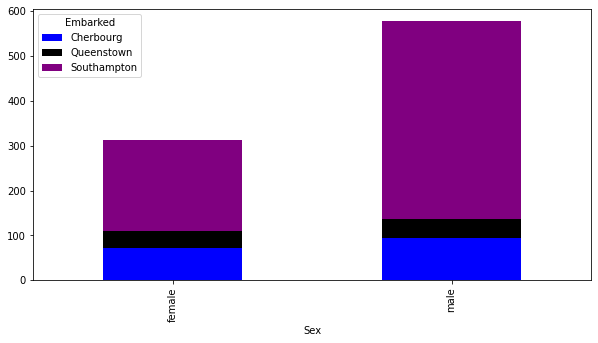

In [178]:
#Stacked bar chart of weekday with day type
pd.crosstab(df_train_updated['Sex'],df_train_updated['Embarked']).plot(kind="bar",stacked=True,figsize=(10,5) , color=['blue','black','purple']);

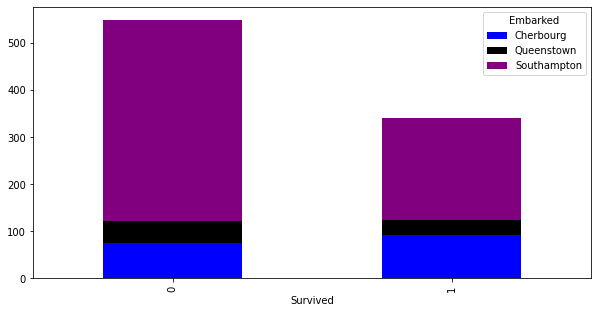

In [179]:
#Stacked bar chart of weekday with day type
pd.crosstab(df_train_updated['Survived'],df_train_updated['Embarked']).plot(kind="bar",stacked=True,figsize=(10,5) , color=['blue','black','purple']);

Most passengers on board titanic from southampton didn't survive.

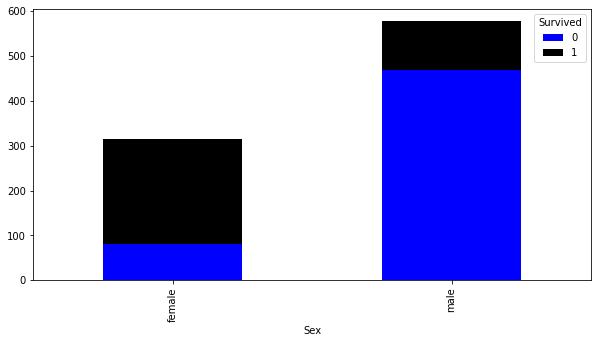

In [180]:
#Stacked bar chart for Survivors by Sex
pd.crosstab(df_train_updated['Sex'],df_train_updated['Survived']).plot(kind="bar",stacked=True,figsize=(10,5) , color=['blue','black','purple']);

0 on the legend represents those who didn't survive while 1 represents those who survived. The above figure shows that most men didn't survive

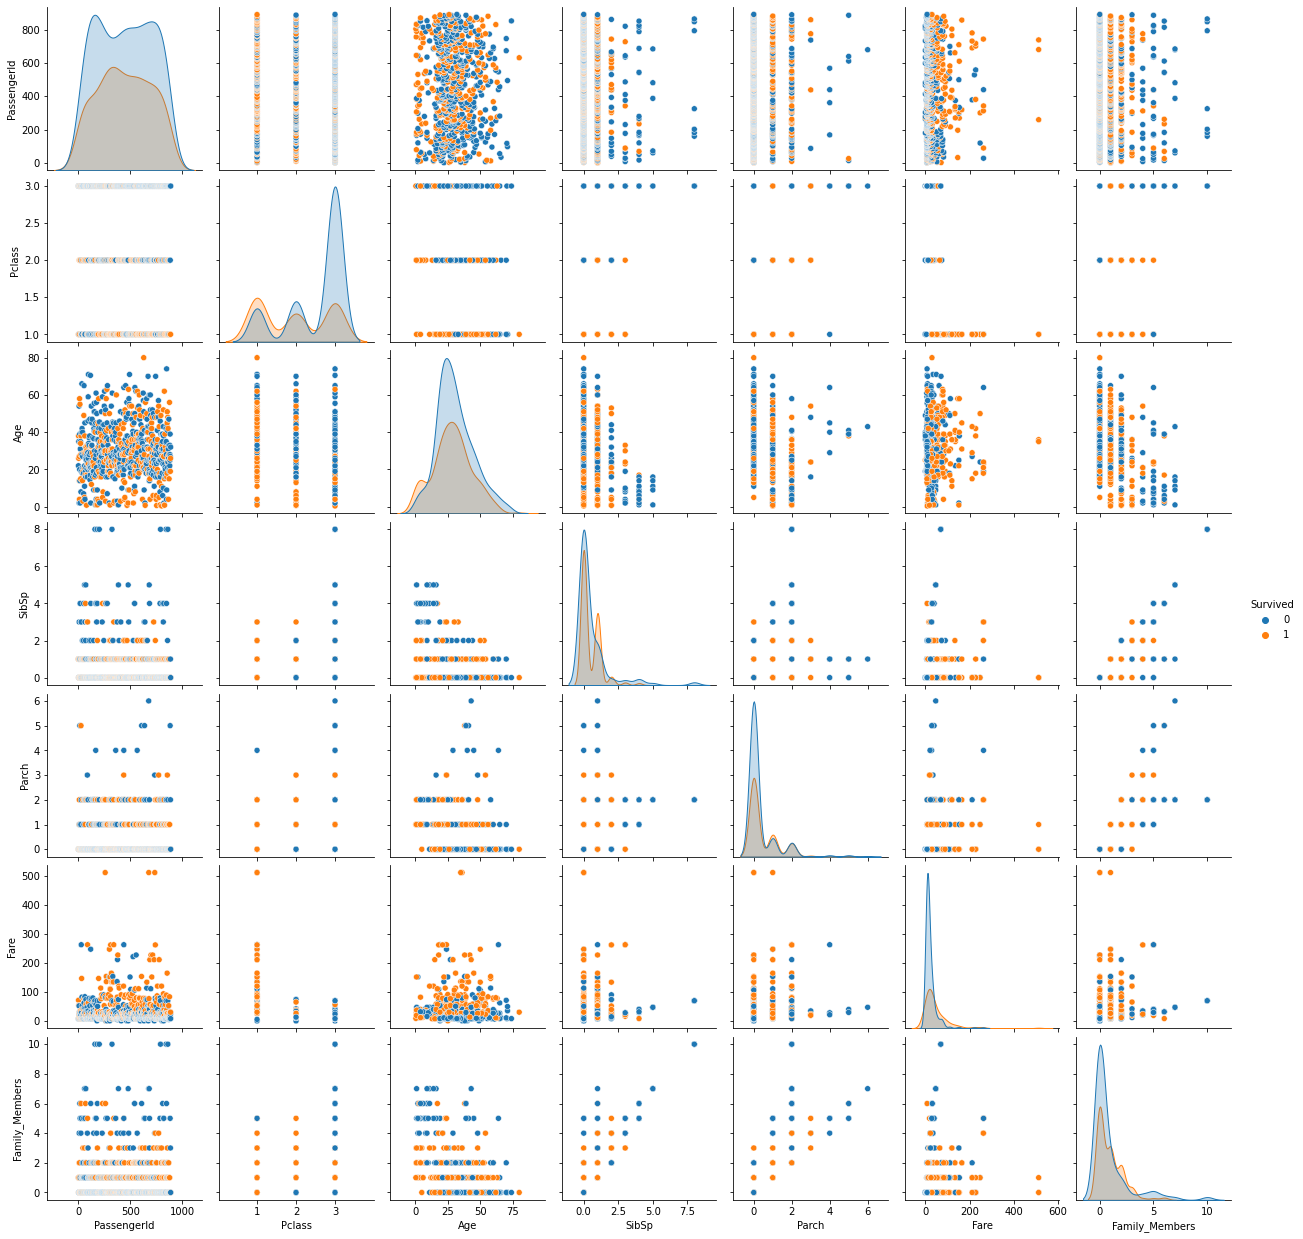

In [203]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df_train_updated, hue="Survived")
plt.show()

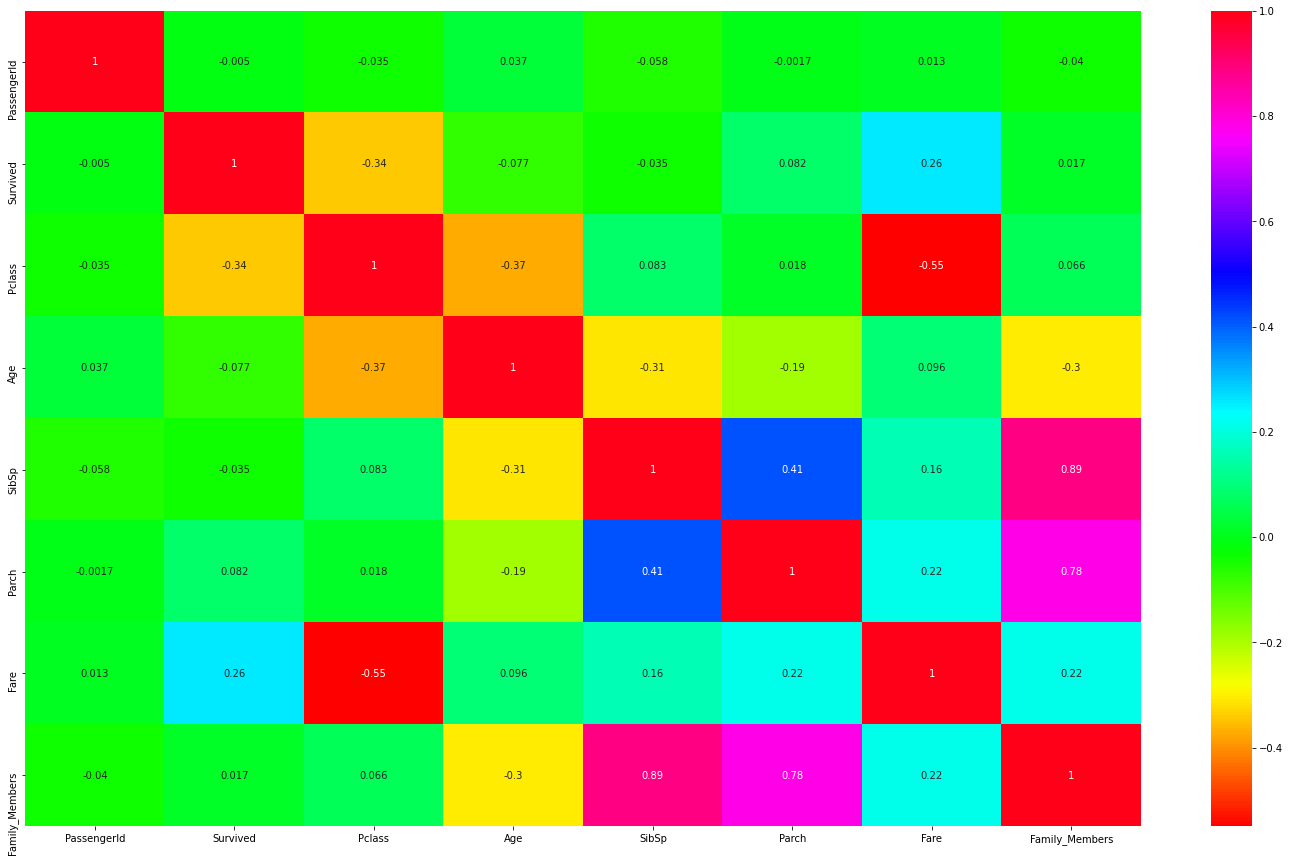

In [204]:
# Plot a heatmap to see the correlation between the variables
import seaborn as sns

corr=df_train_updated.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True,cmap="hsv");

#### 5.0.3 Multivariate Analysis

In [263]:
# Make a copy of the dataframe
corr_df = df_train_updated.copy(deep=True)
corr_df.head(2)

,PassengerId,Age_group,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members,Title
0,1,2,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,1,Mr
1,2,3,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,1,Mrs


In [264]:
# Preview Columns
corr_df.columns


Index(['PassengerId', 'Age_group', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'Family_Members', 'Title'],
      dtype='object')

In [265]:
# Set status as the dependent variable
# Compute the correlation then use the correlation to compute the VIF score for each variable
# We'll drop the price column
corr_df.drop(columns=['Survived'], inplace=True)
prediction_df = corr_df.corr()
prediction_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family_Members
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Family_Members,-0.040143,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


In [266]:
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df.values), index = prediction_df.index, columns=prediction_df.columns)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family_Members
PassengerId,1.004833e+00,2.945715e-02,-2.488440e-11,2.272653,1.586534,-1.490866e-03,-3.227994
Pclass,2.945715e-02,1.511624e+00,8.910677e-10,-80.505924,-58.825265,8.927916e-01,117.481826
Age,-2.488385e-11,8.910628e-10,2.337891e-09,-210.753697,-154.051735,1.409856e-10,308.360351
SibSp,2.272653e+00,-8.050592e+01,-2.107537e+02,-34668.397284,-25320.850568,-1.292096e+01,50653.157545
Parch,1.586534e+00,-5.882526e+01,-1.540517e+02,-25320.850568,-18491.039232,-9.556869e+00,36993.619974
Fare,-1.490866e-03,8.927916e-01,1.409858e-10,-12.920964,-9.556869,1.583245e+00,18.590176
Family_Members,-3.227994e+00,1.174818e+02,3.083604e+02,50653.157545,36993.619974,1.859018e+01,-74005.282416


I will drop 'SibSp' and 'Parch' column and see what effect it has on the Family members column with a VIF of 18.590. The 'SibSp' and	'Parch' columns seem to be linearly correlated to the family member column.		

In [268]:
# drop the correlated columns
prediction_df.drop(['SibSp',	'Parch'], axis=1, inplace=True)
prediction_df

,PassengerId,Pclass,Age,Fare,Family_Members
PassengerId,1.000000,-0.035144,0.036847,0.012658,-0.040143
Pclass,-0.035144,1.000000,-0.369226,-0.549500,0.065997
Age,0.036847,-0.369226,1.000000,0.096067,-0.301914
SibSp,-0.057527,0.083081,-0.308247,0.159651,0.890712
Parch,-0.001652,0.018443,-0.189119,0.216225,0.783111
Fare,0.012658,-0.549500,0.096067,1.000000,0.217138
Family_Members,-0.040143,0.065997,-0.301914,0.217138,1.000000


In [269]:
prediction_df_1 = prediction_df.corr()
prediction_df_1

,PassengerId,Pclass,Age,Fare,Family_Members
PassengerId,1.000000,-0.111453,0.111298,-0.114981,-0.410493
Pclass,-0.111453,1.000000,-0.597726,-0.850283,0.088992
Age,0.111298,-0.597726,1.000000,0.188510,-0.693684
Fare,-0.114981,-0.850283,0.188510,1.000000,0.178583
Family_Members,-0.410493,0.088992,-0.693684,0.178583,1.000000


In [270]:
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df_1.values), index = prediction_df_1.index, columns=prediction_df_1.columns)

,PassengerId,Pclass,Age,Fare,Family_Members
PassengerId,36.825289,129.750056,93.714208,87.434041,52.963687
Pclass,129.750056,473.907502,340.468423,319.732234,190.166516
Age,93.714208,340.468423,247.185077,228.892542,138.762253
Fare,87.434041,319.732234,228.892542,217.004930,127.463320
Family_Members,52.963687,190.166516,138.762253,127.463320,79.312395


In [271]:
prediction_df_1.drop(['PassengerId', 'Fare'], axis=1, inplace=True)
prediction_df_2 = prediction_df_1.corr()
prediction_df_2

,Pclass,Age,Family_Members
Pclass,1.000000,-0.725599,0.269695
Age,-0.725599,1.000000,-0.815107
Family_Members,0.269695,-0.815107,1.000000


In [272]:
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df_2.values), index = prediction_df_2.index, columns=prediction_df_2.columns)

,Pclass,Age,Family_Members
Pclass,6.059010,9.131262,5.808869
Age,9.131262,16.741048,11.183087
Family_Members,5.808869,11.183087,8.548788


### 6.0 Data Cleaning

In [181]:
# Preview the train dataset to know which columns will be dropped
df_train_updated.head(2)

,PassengerId,Age_group,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members,Title
0,1,2,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,1,Mr
1,2,3,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,1,Mrs


I'll drop the Name column, Age, SibSp, Parch, Ticket, Fare and Cabin.

In [182]:
# Before dropping the irrelevant columns, I will make a copy of the train dataframe
df_train_new = df_train_updated.copy(deep=True)
df_train_new.drop(['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare','Cabin'],axis=1, inplace=True)
df_train_new.head(2)

,PassengerId,Age_group,Survived,Pclass,Sex,Embarked,Family_Members,Title
0,1,2,0,3,male,Southampton,1,Mr
1,2,3,1,1,female,Cherbourg,1,Mrs


In [183]:
# check the shape of the train dataset
df_train_new.shape

(891, 8)

In [184]:
# preview the test dataset before dropping irrelevant columns
df_test_copy.head(2)

,PassengerId,Age_group,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members,Title
0,892,2,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,0,Mr
1,893,3,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,1,Mrs


I'll drop the Name column, Age, SibSp, Parch, Ticket, Fare and Cabin.

In [185]:
# Drop unnecessary columns
# First create a copy of the dataframe
df_test_new = df_test_copy.copy(deep=True)
df_test_new.drop(['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)
df_test_new.head(2)

,PassengerId,Age_group,Pclass,Sex,Embarked,Family_Members,Title
0,892,2,3,male,Queenstown,0,Mr
1,893,3,3,female,Southampton,1,Mrs


In [186]:
# Preview the shape of the test dataset
df_test_new.shape

(418, 7)

In [187]:
# Check for duplicates in the test dataset
df_test_new.duplicated().sum()

0

In [188]:
# Check the datatypes for the train dataset
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Age_group       714 non-null    category
 2   Survived        891 non-null    int64   
 3   Pclass          891 non-null    int64   
 4   Sex             891 non-null    object  
 5   Embarked        889 non-null    object  
 6   Family_Members  891 non-null    int64   
 7   Title           891 non-null    object  
dtypes: category(1), int64(4), object(3)
memory usage: 49.9+ KB


In [189]:
# check the datatypes for the test dataset
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     418 non-null    int64   
 1   Age_group       332 non-null    category
 2   Pclass          418 non-null    int64   
 3   Sex             418 non-null    object  
 4   Embarked        418 non-null    object  
 5   Family_Members  418 non-null    int64   
 6   Title           418 non-null    object  
dtypes: category(1), int64(3), object(3)
memory usage: 20.3+ KB


The Pclass should be categorical. So I will change the data types for both datasets

In [190]:
# Change the Pclass datatype for the train set from integer to category
print("The datatypes for the train dataset are as shown below:\n")

df_train_new['Pclass'] = df_train_new['Pclass'].astype(str)
df_train_new.info()

print(' ')

print("\nThe datatypes for the test dataset are as shown below:\n")

# Change the Pclass datatype for the test set from integer to category
df_test_new['Pclass'] = df_test_new['Pclass'].astype(str)
df_test_new.info()

The datatypes for the train dataset are as shown below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Age_group       714 non-null    category
 2   Survived        891 non-null    int64   
 3   Pclass          891 non-null    object  
 4   Sex             891 non-null    object  
 5   Embarked        889 non-null    object  
 6   Family_Members  891 non-null    int64   
 7   Title           891 non-null    object  
dtypes: category(1), int64(3), object(4)
memory usage: 49.9+ KB
 

The datatypes for the test dataset are as shown below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     418 non-null    int64   
 1   Age_group

'Sex', 'Embarked', 'Pclass and 'Title' are in categorical features. They can't be analysed using machine learning models in their current form.  I will perform 'One-Hot Encoding' to turn those categorical features into a numeric binary form.

In [191]:
# perform One Hot Encoding on both datasets
df_train_new = pd.get_dummies(df_train_new, columns=['Sex','Embarked','Pclass','Title'], drop_first=True)
df_test_new = pd.get_dummies(df_test_new, columns=['Sex','Embarked','Pclass','Title'], drop_first=True)

In [192]:
# Preview the datasets
df_test_new.head(2)

,PassengerId,Age_group,Family_Members,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,892,2,0,1,1,0,0,1,0,0,0,0,1,0,0,0
1,893,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0


In [193]:
# Preview the train dataset
df_train_new.head(2)

,PassengerId,Age_group,Survived,Family_Members,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,2,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Check for the normality of the dataset to determine which machine learning model that will be applied

In [194]:
# Preview the datatypes
df_train_new.info(), df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           891 non-null    int64   
 1   Age_group             714 non-null    category
 2   Survived              891 non-null    int64   
 3   Family_Members        891 non-null    int64   
 4   Sex_male              891 non-null    uint8   
 5   Embarked_Queenstown   891 non-null    uint8   
 6   Embarked_Southampton  891 non-null    uint8   
 7   Pclass_2              891 non-null    uint8   
 8   Pclass_3              891 non-null    uint8   
 9   Title_Col             891 non-null    uint8   
 10  Title_Don             891 non-null    uint8   
 11  Title_Dr              891 non-null    uint8   
 12  Title_Jonkheer        891 non-null    uint8   
 13  Title_Lady            891 non-null    uint8   
 14  Title_Major           891 non-null    uint8   
 15  Title_

(None, None)

In [195]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand ordinal data.
label_encoder = preprocessing.LabelEncoder()

# Encode the Age_group column variables for the train dataset
df_train_new['Age_group']= label_encoder.fit_transform(df_train_new['Age_group'])

# Encode the Age_group column variables for the test dataset
df_test_new['Age_group']= label_encoder.fit_transform(df_test_new['Age_group'])

In [196]:
df_train_new.head(2)

,PassengerId,Age_group,Survived,Family_Members,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,2,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [197]:
# Preview the info for the two datasets
print(f"{df_train_new.info()}, {df_test_new.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   PassengerId           891 non-null    int64
 1   Age_group             891 non-null    int64
 2   Survived              891 non-null    int64
 3   Family_Members        891 non-null    int64
 4   Sex_male              891 non-null    uint8
 5   Embarked_Queenstown   891 non-null    uint8
 6   Embarked_Southampton  891 non-null    uint8
 7   Pclass_2              891 non-null    uint8
 8   Pclass_3              891 non-null    uint8
 9   Title_Col             891 non-null    uint8
 10  Title_Don             891 non-null    uint8
 11  Title_Dr              891 non-null    uint8
 12  Title_Jonkheer        891 non-null    uint8
 13  Title_Lady            891 non-null    uint8
 14  Title_Major           891 non-null    uint8
 15  Title_Master          891 non-null    uint8
 16  Title_Mi

In [213]:
# Create a copy of the dataframe
lda_df = df_train_new.copy(deep=True)

In [215]:
lda_df.columns

Index(['PassengerId', 'Age_group', 'Survived', 'Family_Members', 'Sex_male',
       'Embarked_Queenstown', 'Embarked_Southampton', 'Pclass_2', 'Pclass_3',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

In [216]:
# Create features and labels

X = lda_df[['PassengerId', 'Age_group', 'Survived', 'Family_Members', 'Sex_male',
            'Embarked_Queenstown', 'Embarked_Southampton', 'Pclass_2', 'Pclass_3',
            'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
            'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
            'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
            'Title_the Countess']].values

y = lda_df['Survived'].values

In [217]:
# Divide data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

3.9968028886505635e-15
[-1.30960080e-18 -1.04083409e-17  1.00000000e+00 -4.03118878e-15
 -1.19052874e-16 -1.93485358e-16 -3.22785387e-16  7.03109578e-16
  6.52228659e-16 -3.83915739e-16  0.00000000e+00 -7.13276553e-17
  0.00000000e+00  2.71266473e-17 -6.78891715e-17 -5.35892650e-17
 -3.94983379e-16  1.84687064e-17 -9.49981332e-17  5.94603576e-16
  1.31510335e-17  4.41882530e-17 -2.44096261e-16  0.00000000e+00
  1.12492752e-16]


In [219]:
X = lda_df[['Survived', 'Pclass_2', 'Pclass_3', 'Title_Don', 'Title_Jonkheer',
            'Title_Lady', 'Title_Mlle', 'Title_Mr', 'Title_Mrs', 'Title_Ms',
            'Title_Sir', 'Title_the Countess']].values

y = lda_df['Survived'].values

In [220]:
# Divide data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-1.0547118733938987e-15
[ 1.00000000e+00  6.88871014e-17  3.56401345e-16  1.35210508e-17
  2.31597927e-18  1.38044735e-16  1.34116965e-16 -2.51471472e-17
 -1.43476663e-17 -7.76079584e-17  0.00000000e+00  1.38044735e-16]


In [200]:
# First check the datatypes
df_train_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Age_group       714 non-null    category
 2   Survived        891 non-null    int64   
 3   Pclass          891 non-null    int64   
 4   Name            891 non-null    object  
 5   Sex             891 non-null    object  
 6   Age             714 non-null    float64 
 7   SibSp           891 non-null    int64   
 8   Parch           891 non-null    int64   
 9   Ticket          891 non-null    object  
 10  Fare            891 non-null    float64 
 11  Cabin           204 non-null    object  
 12  Embarked        889 non-null    object  
 13  Family_Members  891 non-null    int64   
 14  Title           891 non-null    object  
dtypes: category(1), float64(2), int64(6), object(6)
memory usage: 98.6+ KB


In [273]:
# Then Check the data distribution type by performing a normality test using the Shapiro Test
# importing the shapiro function
from scipy.stats import shapiro

col_names3 = df_train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',]]

# Test for normality
stat, p = shapiro(col_names3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpreting the results
alpha = 0.05
if p > alpha: 
  print('Sample looks Guassian.')
else:
  print('Sample does not look Guassian.')

Statistics=nan, p=1.000
Sample looks Guassian.


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 7.0 KNN Model Implementation

### Train Set Split 80:20

In [274]:
# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = classifier.predict(X_train)

Accuracy score =: 1.0 ,f1 score = 1.0
[[105   0]
 [  0  74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(0, 0.5, 'Mean Error')

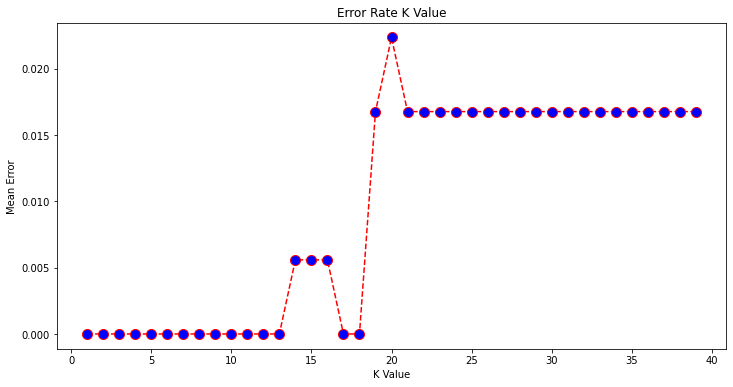

In [275]:
# Find the best value of K by plotting a graph of K value and the corresponding error rate for the dataset.
# Then plot the mean error for the predicted values of test set for all the K values between 1 and 40.

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

#plot the error values against K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


From the output, the mean error is zero when the value of the K is 5. This is the value I will apply after finding best params.

#### training Set Split 70:30

In [278]:
# Train Test Split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 1.0 ,f1 score = 1.0
[[157   0]
 [  0 111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       111

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



Text(0, 0.5, 'Mean Error')

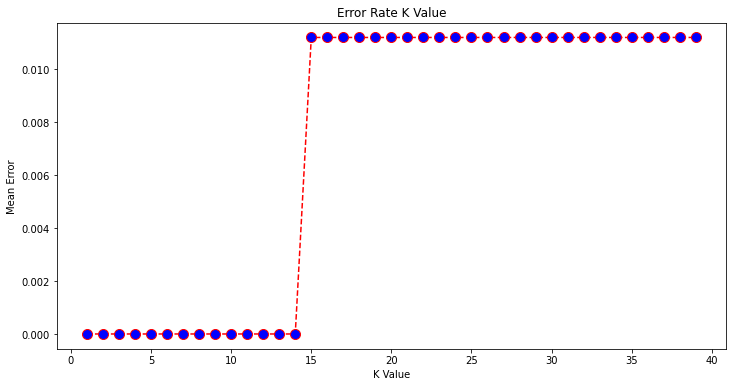

In [279]:
# Find the best value of K by plotting the graph of K value and the corresponding error rate for the dataset.
# then plot the mean error for the predicted values of test set for all the K values between 1 and 40.

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

#plot the error values against K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


From the above output, the mean error still remains zero when the value of the K is 0.5.

In [280]:
# Train Test Split (60-40)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 1.0 ,f1 score = 1.0
[[221   0]
 [  0 136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       136

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357



Text(0, 0.5, 'Mean Error')

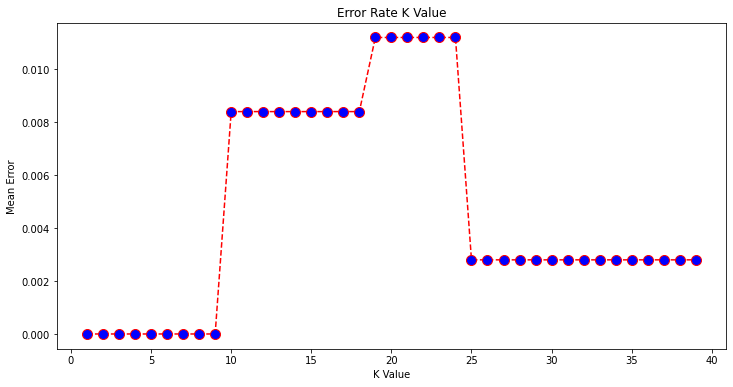

In [281]:
# finf the value of K and error rate
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

#plot the error values against K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### hyperparameter Tuning

In [282]:
# Check the hyperparameters to tune
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [283]:
# import randonCV
from sklearn.model_selection import RandomizedSearchCV

# define the parameter values that should be searched
k_range = list(range(1, 51))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)
leaf_size = list(range(1,50))
# we create a list
weight_options = ['uniform', 'distance']

# specify "parameter distributions" rather than a "parameter grid"

# since both parameters are discrete, so param_dist is the same as param_grid
param_dist = dict(n_neighbors=k_range, weights=weight_options, leaf_size=leaf_size)

# if parameters are continuous (like regularization)

# n_iter controls the number of searches

# instantiate model
# 2 new params
# n_iter --> controls number of random combinations it will try
# random_state for reproducibility 
knn = KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

# fit
rand.fit(X, y)


# examine the best model
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

1.0
{'weights': 'distance', 'n_neighbors': 8, 'leaf_size': 30}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')


In [284]:
# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 1.0 ,f1 score = 1.0
[[221   0]
 [  0 136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       136

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357



### Challenging the Solution

#### 1. Using Linear discriminant Analysis

In [286]:
# Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy score =: 0.7450980392156863 ,f1 score = 0.7073954983922829
[[156  65]
 [ 26 110]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.77       221
           1       0.63      0.81      0.71       136

    accuracy                           0.75       357
   macro avg       0.74      0.76      0.74       357
weighted avg       0.77      0.75      0.75       357



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


#### 2.0 Logistic Regression

In [287]:
# challenge the solution using logistic regression with a maximum itearation of 500
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [288]:
# check the scores for the train test
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7902621722846442, 0.7703081232492998)

#### Performing the Prediction

In [290]:
df_test_new.head(2)

,PassengerId,Age_group,Family_Members,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,892,2,0,1,1,0,0,1,0,0,0,0,1,0,0,0
1,893,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0


In [292]:
df_train_new.columns

Index(['PassengerId', 'Age_group', 'Survived', 'Family_Members', 'Sex_male',
       'Embarked_Queenstown', 'Embarked_Southampton', 'Pclass_2', 'Pclass_3',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

In [293]:
df_test_new.columns

Index(['PassengerId', 'Age_group', 'Family_Members', 'Sex_male',
       'Embarked_Queenstown', 'Embarked_Southampton', 'Pclass_2', 'Pclass_3',
       'Title_Dona', 'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev'],
      dtype='object')

In [294]:
# let us drop the age column cause we have age groups now
train_copy=df_train_new.copy(deep=True)
column = ['Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess']
       
train_copy.drop(columns=column,axis=1,inplace=True)
train_copy.head(2)

,PassengerId,Age_group,Survived,Family_Members,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3
0,1,2,0,1,1,0,1,0,1
1,2,3,1,1,0,0,0,0,0


In [299]:
# Move the Survived column to index 0

move = train_copy['Survived']
train_copy.drop(labels=['Survived'], axis=1, inplace = True)
train_copy.insert(0, 'Survived', move)
train_copy.head()

,Survived,PassengerId,Age_group,Family_Members,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3
0,0,1,2,1,1,0,1,0,1
1,1,2,3,1,0,0,0,0,0
2,1,3,2,0,0,0,1,0,1
3,1,4,2,1,0,0,1,0,0
4,0,5,2,0,1,0,1,0,1


In [296]:
test_copy=df_test_new.copy(deep=True)

column_1 = ['Title_Dona', 'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr',
            'Title_Mrs', 'Title_Ms', 'Title_Rev']

test_copy.drop(columns=column_1,axis=1,inplace=True)
test_copy.head(2)

,PassengerId,Age_group,Family_Members,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3
0,892,2,0,1,1,0,0,1
1,893,3,1,0,0,1,0,1


In [304]:
# let us now use our best params to predict the test data
clf_knn = KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                    weights='uniform')
clf_knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')

In [305]:
test_final = pd.get_dummies(test_copy, drop_first=True)
test_final.head()

,PassengerId,Age_group,Family_Members,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3
0,892,2,0,1,1,0,0,1
1,893,3,1,0,0,1,0,1
2,894,4,0,1,1,0,1,0
3,895,2,0,1,0,1,0,1
4,896,2,2,0,0,1,0,1


#### Conclusion
The project set objective is achieved by using K-nearest neighbor to create a prediction model. A metrics score of an accuracy score of higher than 95% was also achied. It is evident from the analysis that most women survived the titanic shipwreck as compared to the males. many people on board were youth followed by adults. Most of the people who survived were those with 3 family members. This could be because they had minimal time to save one other as compared to those who had a big family size. 

#### Follow up questions
a). Did we have the right data?

Yes. The data to carry outthe prediction model was viable.

b). Do we need other data to answer our question?

No. There's no need because the data provided was sufficient.

c). Did we have the right question?

Yes. 

#### recommendation

It is noted that the lifeboats or jackets onboard were few, which were given to women. to curb such accidents in future, more life saving equipment and apparrells need to be kept onboard at all times to ensure that there's no loss of life as encountered before.